# Работа с изображениями

### Классификация изображений

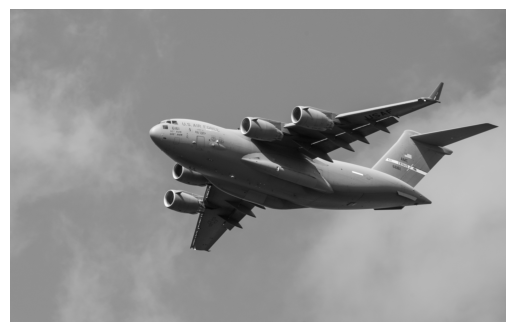

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("../data/images/plane.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.show()

In [5]:
type(image)

numpy.ndarray

In [6]:
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]],
      shape=(2270, 3600), dtype=uint8)

In [7]:
image.shape

(2270, 3600)

Автор превратил изображение в массив NumPy с числовыми данными, где каждый элемент значения варьируется от черного (0) до белого (255). <br>
Также можно узнать размер нашей матрицы через команду image.shape

In [14]:
image_bgr = cv2.imread("../data/images/plane.jpg", cv2.IMREAD_COLOR)
image_bgr[0,0]

array([195, 144, 111], dtype=uint8)

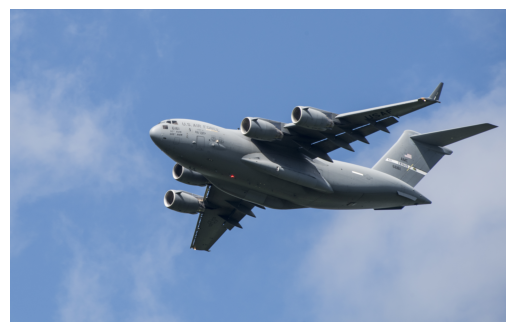

In [17]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [18]:
from matplotlib import pyplot as plt
image = cv2.imread("../data/images/plane.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imwrite("../data/images/plane_new2.jpg", image)

True

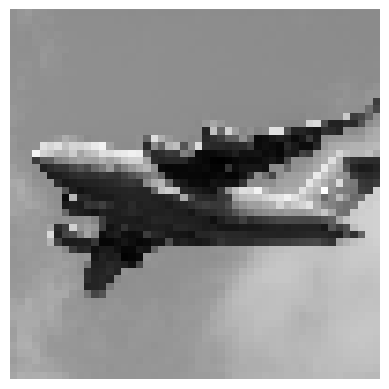

In [20]:
image = cv2.imread("../data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
image_50x50 = cv2.resize(image, (50, 50))
plt.imshow(image_50x50, cmap="gray")
plt.axis("off")
plt.show()

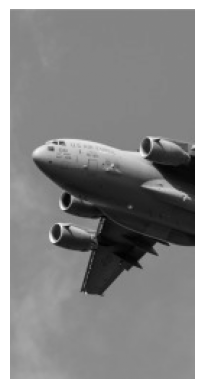

In [21]:
image = cv2.imread("../data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
image_cropped = image[:,:128]
plt.imshow(image_cropped, cmap="gray")
plt.axis("off")
plt.show()

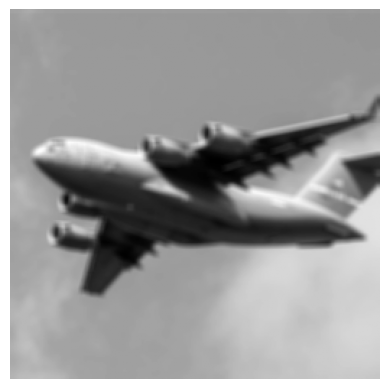

In [23]:
image = cv2.imread("../data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
image_blurry = cv2.blur(image, (5,5))
plt.imshow(image_blurry, cmap="gray")
plt.axis("off")
plt.show()

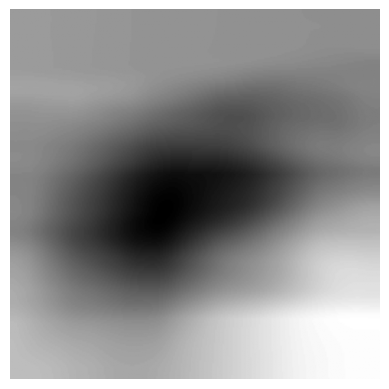

In [24]:
image_blurry = cv2.blur(image, (100,100))
plt.imshow(image_blurry, cmap="gray")
plt.axis("off")
plt.show()

Размывающее ядро. Центральным элементов в ядре является исследуемый пиксель, а остальные - его соседи. <br>
Все элементы равны м/у собой (нормализованные, в сумме 1). Ядро можно применить к изображению вручную с помощью фильтра filter2D

In [25]:
kernel = np.ones((5,5))/25.0
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

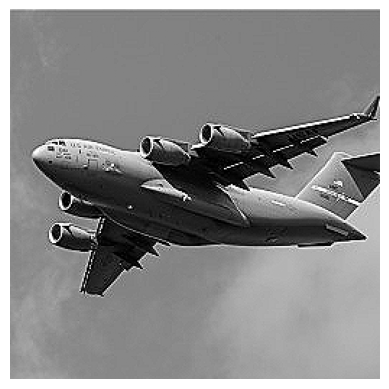

In [27]:
image = cv2.imread("../data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])
image_sharp = cv2.filter2D(image, -1, kernel)
plt.imshow(image_sharp, cmap="gray")
plt.axis("off")
plt.show()

### Усиление контрастности и выделение цвета

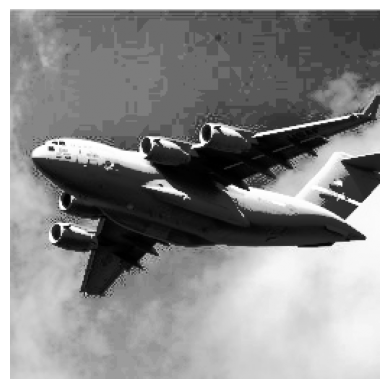

In [31]:
image = cv2.imread("../data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE )
image_enhanced = cv2.equalizeHist(image)
plt.imshow(image_enhanced, cmap="gray")
plt.axis("off")
plt.show()

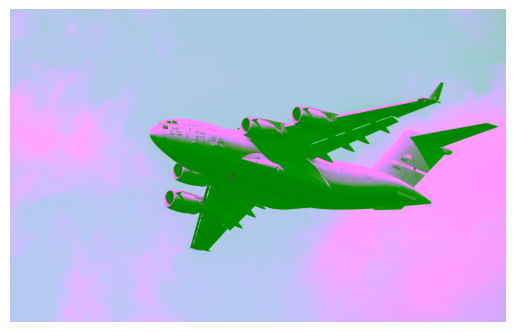

In [33]:
image_bgr = cv2.imread("../data/images/plane.jpg")
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_YUV2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

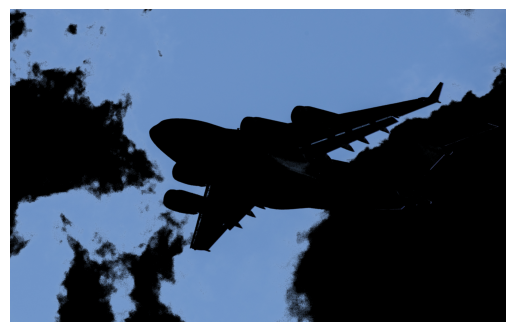

In [36]:
image_bgr = cv2.imread("../data/images/plane.jpg")
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
lowe_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])
mask = cv2.inRange(image_hsv, lowe_blue, upper_blue)
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()